<a href="https://colab.research.google.com/github/GUEST72/CSC311-Machine-Learning-projects/blob/main/assignment_1/assignment_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Important libraries that will be used

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns


Reading the data and preprocessing it

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()
scaler = StandardScaler()



In [ ]:
X=df.drop("median_house_value",axis=1)  # inputs
Y=df["median_house_value"]    # output

X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [ ]:
x_tmp,X_test,y_tmp,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)  #15% of data to be test
X_train,X_val,y_train,y_val=train_test_split(x_tmp,y_tmp,test_size=0.175,random_state=42)  #0.175 * 0.85 = 0.15

x_train=scaler.fit_transform(X_train)
x_val=scaler.transform(X_val)
x_test=scaler.transform(X_test)




USING THE SCKIT LEARNING

In [ ]:
  #Linear Regression Doesn't have HyperParameters

  LR=LinearRegression()
  LR.fit(x_train,y_train) # fitting on the train data
  y_pred=LR.predict(x_val)    # predicting the validation data
  print("Linear Regression MSE:", mean_squared_error(y_val, y_pred))
  print("Linear Regression MAE:", mean_absolute_error(y_val, y_pred))

Linear Regression MSE: 5287345561.205124
Linear Regression MAE: 52091.5764571504


In [ ]:
#Hyperparameter for Lasso and Ridge is alpha

alphas = np.logspace(-2, 4, 10) #creating 10 samples of alphas from 10^-2 to 10^4
train_mse_scikit_ridge_errors = []
train_ase_scikit_ridge_errors = []
val_mse_scikit_ridge_errors = []
val_ase_scikit_ridge_errors = []
train_mse_scikit_lasso_errors = []
train_ase_scikit_lasso_errors = []
val_mse_scikit_lasso_errors = []
val_ase_scikit_lasso_errors = []
best_val_mse_ridge=float('inf')
best_val_ase_ridge=float('inf')
best_alpha_ridge_scikit=0
best_val_mse_lasso=float('inf')
best_val_ase_lasso=float('inf')
best_alpha_lasso_scikit=0

# finding the best alpha to avoid overfitting
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  y_pred_ridge = ridge.predict(x_train) # training the model using train data

  train_mse_scikit_ridge_errors.append(mean_squared_error(y_train, y_pred_ridge))
  train_ase_scikit_ridge_errors.append(mean_absolute_error(y_train, y_pred_ridge))

  y_pred_val_ridge = ridge.predict(x_val)
  val_mse_scikit_ridge_errors.append(mean_squared_error(y_val, y_pred_val_ridge))
  val_ase_scikit_ridge_errors.append(mean_absolute_error(y_val, y_pred_val_ridge))

  if (mean_squared_error(y_val, y_pred_val_ridge)<best_val_mse_ridge): # Finding the Best MSE for the Validation data to the Ridge
    best_val_mse_ridge=mean_squared_error(y_val, y_pred_val_ridge)
    best_val_ase_ridge=mean_absolute_error(y_val, y_pred_val_ridge)
    best_alpha_ridge_scikit = alpha


  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  y_pred_lasso = lasso.predict(x_train)
  train_mse_scikit_lasso_errors.append(mean_squared_error(y_train, y_pred_lasso))
  train_ase_scikit_lasso_errors.append(mean_absolute_error(y_train, y_pred_lasso))
  y_pred_val_lasso = lasso.predict(x_val)
  val_mse_scikit_lasso_errors.append(mean_squared_error(y_val, y_pred_val_lasso))
  val_ase_scikit_lasso_errors.append(mean_absolute_error(y_val, y_pred_val_lasso))


  if  (mean_squared_error(y_val, y_pred_val_lasso)<best_val_mse_lasso): # Finding the Best MSE for the Validation data to the Lasso
    best_val_mse_lasso=mean_squared_error(y_val, y_pred_val_lasso)
    best_val_ase_lasso=mean_absolute_error(y_val, y_pred_val_lasso)
    best_alpha_lasso_scikit = alpha

print("Best alpha of Ridge:", best_alpha_ridge_scikit)
print("Lowest MSE of Ridge:", best_val_mse_ridge)
print("Lowest ASE of Ridge:", best_val_ase_ridge)

print("Best alpha lasso:", best_alpha_lasso_scikit)
print("Lowest MSE lasso:", best_val_mse_lasso)
print("Lowest ASE lasso:", best_val_ase_lasso)


Best alpha of Ridge: 0.01
Lowest MSE of Ridge: 5287358548.568142
Lowest ASE of Ridge: 52091.73007605168
Best alpha lasso: 0.01
Lowest MSE lasso: 5287346051.047832
Lowest ASE lasso: 52091.58500438992


Plotting the MSE of Train and Validate Data

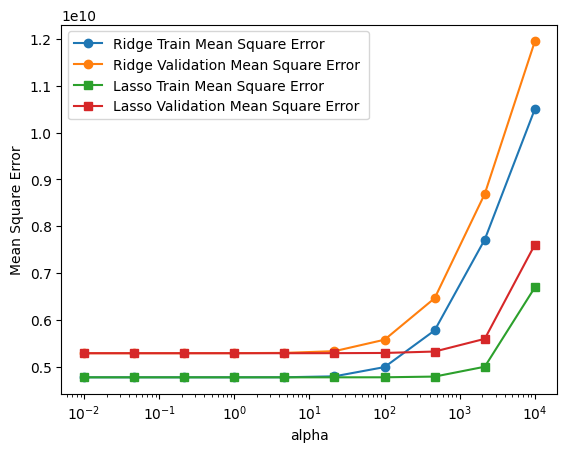

In [ ]:
plt.plot(alphas, train_mse_scikit_ridge_errors, marker='o', label='Ridge Train Mean Square Error')
plt.plot(alphas, val_mse_scikit_ridge_errors, marker='o', label='Ridge Validation Mean Square Error')
plt.plot(alphas, train_mse_scikit_lasso_errors, marker='s', label='Lasso Train Mean Square Error ')
plt.plot(alphas, val_mse_scikit_lasso_errors, marker='s', label='Lasso Validation Mean Square Error ')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.show()


# Manual Implementation of the Models

linear Regression without Gradient


In [ ]:
def linear_regression_normal_equation(X, y):

    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])  #adding bias to X

    # Matrices operations to get the Best B and W of Equation (Xt.X)^-1  Xt y
    XtX = np.dot(X_with_bias.T, X_with_bias)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X_with_bias.T, y)
    weights = np.dot(XtX_inv, Xty)
    bias = weights[0]
    coefficients = weights[1:]

    return coefficients, bias

Linear Regression with Gradient


In [ ]:

def linear_gradient_regression_fit(X, y, learning_rate=0.01, epochs=1000):
  m, n = X.shape
  W = np.zeros(n)
  bias = 0
  for epoch in range(epochs):
    #getting the best W and b using Gradient Descent
      y_pred = np.dot(X, W) + bias
      dw=(1/m)*np.dot(X.T,(y_pred-y))
      db=(1/m)*np.sum(y_pred-y)
      W=W-learning_rate*dw
      bias=bias-learning_rate*db
  return W,bias


Predicting any model of equation Y=X.W+b


In [ ]:
def predict(X, W, bias):
    return np.dot(X, W) + bias

Ridge Without Gradient using equation of (Xt X +  lambda * I) Xt .y

In [ ]:

def ridge_fit_matrix(X, y, alpha):

    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X_with_bias.T @ X_with_bias
    I = np.eye(XTX.shape[0])
    I[0, 0] = 0
    ridge_matrix = XTX + alpha * I
    weights = np.linalg.inv(ridge_matrix) @ X_with_bias.T @ y
    bias = weights[0]
    w = weights[1:]

    return w, bias

Ridge With Gradient

In [ ]:
def ridge_fit(X, y, learning_rate=0.01, epochs=1000, alpha=0.01):
  n_samples, n_features = X.shape
  W = np.zeros(n_features)
  bias = 0
  for epoch in range(epochs):
    y_pred = np.dot(X, W) + bias
    dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)) + alpha * W) ####
    db=(1/n_samples)*np.sum(y_pred-y)
    W=W-learning_rate*dw
    bias=bias-learning_rate*db
  return W,bias



Lasso with Gradient

In [ ]:
def lasso_fit(X, y, learning_rate=0.01, epochs=1000, alpha=0.01):
  n_samples, n_features = X.shape
  W = np.zeros(n_features)
  bias = 0
  for epoch in range(epochs):
    y_pred = np.dot(X, W) + bias
    dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)) + alpha * np.sign(W))
    db=(1/n_samples)*np.sum(y_pred-y)
    W=W-learning_rate*dw
    bias=bias-learning_rate*db
  return W,bias

Finding the best Hyperparameters for each model and Error for validate set

In [ ]:
Learning_rate=[0.0001, 0.001,0.01,0.1]
epochs=[10,50,100,500,1000,2000,5000,10000]
alphas = np.logspace(-2, 2, 10)
mse_train_errors_ridge=[]
ase_train_errors_ridge=[]
val_mse_errors_ridge=[]
val_ase_errors_ridge=[]
best_val_mse_ridge=float('inf')
best_val_ase_ridge=float('inf')

best_lr_ridge=0
best_epoch_ridge=0
best_alpha_ridge=0

mse_lasso_train_errors=[]
ase_lasso_train_errors=[]
val_mse_lasso_errors=[]
val_ase_lasso_errors=[]
best_val_mse_lasso=float('inf')
best_val_ase_lasso=float('inf')
x_train_lasso=x_train.copy()
x_val_lasso=x_val.copy()
y_train_lasso=y_train.copy()
y_val_lasso=y_val.copy()
best_lr_lasso=0
best_epoch_lasso=0
best_alpha_lasso=0


train_mse_LR_errors=[]
train_ase_LR_errors=[]
val_mse_LR_errors=[]
val_ase_LR_errors=[]
best_val_mse_LR=float('inf')
best_val_ase_LR=float('inf')
best_lr_LR=0
best_epoch_LR=0
for lr in Learning_rate:
  for ep in epochs:
    w_LR_Gradient = np.zeros(x_train.shape[1]) # finding best Hyperparameters for Linear Regression
    b_LR_Gradient = 0
    w_LR_Gradient, b_LR_Gradient = linear_gradient_regression_fit(x_train, y_train, learning_rate=lr, epochs=ep)
    y_pred_LR = predict(x_train, w_LR_Gradient, b_LR_Gradient)
    train_mse_LR_errors.append(mean_squared_error(y_train, y_pred_LR))
    train_ase_LR_errors.append(mean_absolute_error(y_train, y_pred_LR))
    y_val_pred_LR = predict(x_val, w_LR_Gradient, b_LR_Gradient)
    val_mse_LR_errors.append(mean_squared_error(y_val, y_val_pred_LR))
    val_ase_LR_errors.append(mean_absolute_error(y_val, y_val_pred_LR))
    if (mean_squared_error(y_val, y_val_pred_LR)<best_val_mse_LR):
      best_val_mse_LR=mean_squared_error(y_val, y_val_pred_LR)
      best_val_ase_LR=mean_absolute_error(y_val, y_val_pred_LR)
      best_lr_LR = lr
      best_epoch_LR = ep


    for alpha in alphas: # Finding Best Hyperparameters for Lasso and Ridge

      w_ridge=np.zeros(x_train.shape[1])
      w_lasso=np.zeros(x_train.shape[1])
      bias_lasso=0
      bias_ridge=0
      w_lasso,bias_lasso=lasso_fit(x_train_lasso, y_train_lasso, learning_rate=lr, epochs=ep, alpha=alpha)
      y_pred_lasso=predict(x_train_lasso,w_lasso,bias_lasso)
      mse_lasso_train_errors.append(mean_squared_error(y_train_lasso, y_pred_lasso))
      ase_lasso_train_errors.append(mean_absolute_error(y_train_lasso, y_pred_lasso))
      y_val_pred_lasso=predict(x_val_lasso,w_lasso,bias_lasso)
      val_mse_lasso_errors.append(mean_squared_error(y_val_lasso, y_val_pred_lasso))
      val_ase_lasso_errors.append(mean_absolute_error(y_val_lasso, y_val_pred_lasso))


      if (mean_squared_error(y_val_lasso, y_val_pred_lasso)<best_val_mse_lasso): # To find the best Validation Mean squared Errors for Lassso
          best_val_mse_lasso=mean_squared_error(y_val_lasso, y_val_pred_lasso)
          best_val_ase_lasso=mean_absolute_error(y_val_lasso, y_val_pred_lasso)
          best_lr_lasso = lr
          best_epoch_lasso = ep
          best_alpha_lasso = alpha

      w_ridge , bias_ridge= ridge_fit(x_train, y_train, learning_rate=lr, epochs=ep, alpha=alpha)
      y_pred=predict(x_train,w_ridge,bias_ridge)


      mse_train_errors_ridge.append(mean_squared_error(y_train, y_pred))
      ase_train_errors_ridge.append(mean_absolute_error(y_train, y_pred))

      y_val_pred=predict(x_val,w_ridge,bias_ridge)
      val_mse_errors_ridge.append(mean_squared_error(y_val, y_val_pred))
      val_ase_errors_ridge.append(mean_absolute_error(y_val, y_val_pred))

      if (mean_squared_error(y_val, y_val_pred)<best_val_mse_ridge): # To find the best Validation Mean squared Errors for Ridge
          best_val_mse_ridge=mean_squared_error(y_val, y_val_pred)
          best_val_ase_ridge=mean_absolute_error(y_val, y_val_pred)
          best_lr_ridge = lr
          best_epoch_ridge = ep
          best_alpha_ridge = alpha




print("Best learning rate of Ridge:", best_lr_ridge)
print("Best number of epochs of Ridge:", best_epoch_ridge)
print("Best alpha of Ridge:", best_alpha_ridge)
print("Lowest MSE of Ridge:", best_val_mse_ridge)
print("Lowest ASE of Ridge:", best_val_ase_ridge)

print("Best learning rate lasso:", best_lr_lasso)
print("Best epoch lasso:", best_epoch_lasso)
print("Best alpha lasso:", best_alpha_lasso)
print("Lowest MSE lasso:", best_val_mse_lasso)
print("Lowest ASE lasso:", best_val_ase_lasso)






Best learning rate of Ridge: 0.1
Best number of epochs of Ridge: 10000
Best alpha of Ridge: 0.01
Lowest MSE of Ridge: 5287358548.705844
Lowest ASE of Ridge: 52091.73007682101
Best learning rate lasso: 0.1
Best epoch lasso: 10000
Best alpha lasso: 0.01
Lowest MSE lasso: 5287345561.572866
Lowest ASE lasso: 52091.57646195345


Printing the best Validation set Error

In [ ]:
lr_weights, lr_bias = linear_regression_normal_equation(x_train, y_train)
lr_predict = predict(x_val, lr_weights, lr_bias)
best_Linear_MSE=mean_squared_error(y_val, lr_predict)
best_Linear_ASE=mean_absolute_error(y_val, lr_predict)

w_ridge_normal=np.zeros(x_train.shape[1])
bias_ridge_normal=0
w_ridge_normal,bias_ridge_normal=ridge_fit_matrix(x_train, y_train, alpha=best_alpha_ridge)
y_pred_ridge_normal=predict(x_val,w_ridge_normal,bias_ridge_normal)
best_val_mse_ridge_normal=mean_squared_error(y_val, y_pred_ridge_normal)
best_val_ase_ridge_normal=mean_absolute_error(y_val, y_pred_ridge_normal)
print("MSE Ridge without Gradient:", best_val_mse_ridge)
print("ASE Ridge without Gradient:", best_val_ase_ridge)
print("MSE Linear without Gradient:", best_Linear_MSE)
print("ASE Linear without Gradient:", best_Linear_ASE)
print("MSE Linear with Gradient",best_val_mse_LR)
print("ASE Linear with Gradient",best_val_ase_LR)






MSE Ridge without Gradient: 5287358548.705844
ASE Ridge without Gradient: 52091.73007682101
MSE Linear without Gradient: 5287345561.205123
ASE Linear without Gradient: 52091.5764571504
MSE Linear with Gradient 5287345561.343495
ASE Linear with Gradient 52091.576457923584


Plotting the difference between Epochs and MSE

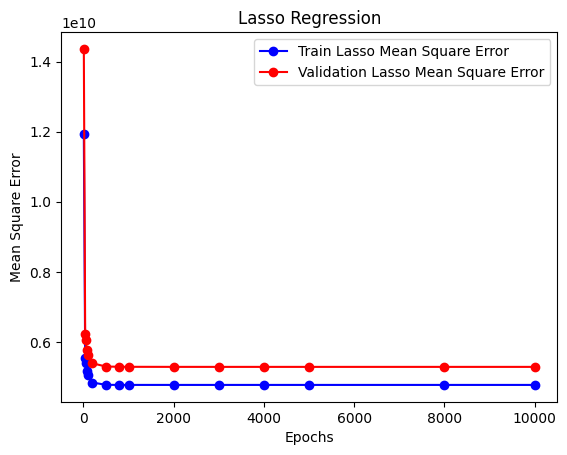

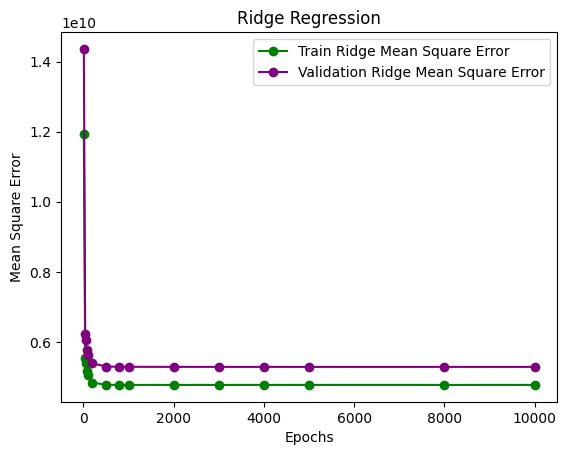

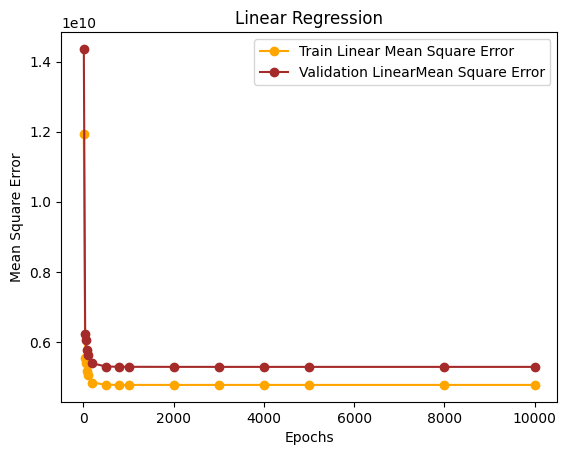

In [ ]:
epochs=[10,40,50,80,100,200,500,800,1000,2000,3000,4000,5000,8000,10000]
val_lasso_plot_mean_squared_errors =[]
train_lasso_plot_mean_squared_errors=[]
val_ridge_plot_mean_squared_errors=[]
train_ridge_plot_mean_squared_errors=[]
val_Linear_plot_mean_squared_errors=[]
train_Linear_plot_mean_squared_errors=[]
for epoch in epochs:
  w_lasso=np.zeros(x_train.shape[1])
  bias_lasso=0

  w_lasso,bias_lasso=lasso_fit(x_train_lasso, y_train_lasso, learning_rate=best_lr_lasso, epochs=epoch, alpha=best_alpha_lasso)

  val_y_pred=predict(x_val_lasso,w_lasso,bias_lasso)
  train_y_pred=predict(x_train_lasso,w_lasso,bias_lasso)

  val_lasso_plot_mean_squared_errors.append(mean_squared_error(y_val_lasso, val_y_pred))
  train_lasso_plot_mean_squared_errors.append(mean_squared_error(y_train_lasso, train_y_pred))


  w_ridge=np.zeros(x_train.shape[1])
  bias_ridge=0

  w_ridge,bias_ridge=ridge_fit(x_train, y_train, learning_rate=best_lr_ridge, epochs=epoch, alpha=best_alpha_ridge)

  val_y_pred_ridge=predict(x_val,w_ridge,bias_ridge)
  train_y_pred_ridge=predict(x_train,w_ridge,bias_ridge)

  val_ridge_plot_mean_squared_errors.append(mean_squared_error(y_val, val_y_pred_ridge))
  train_ridge_plot_mean_squared_errors.append(mean_squared_error(y_train, train_y_pred_ridge))

  lr_weights, lr_bias = linear_gradient_regression_fit(x_train, y_train,learning_rate=best_lr_LR,epochs=epoch)

  lr_predict_val = predict(x_val, lr_weights, lr_bias)
  lr_predict_train=predict(x_train, lr_weights, lr_bias)

  val_Linear_plot_mean_squared_errors.append(mean_squared_error(y_val, lr_predict_val))
  train_Linear_plot_mean_squared_errors.append(mean_squared_error(y_train, lr_predict_train))


plt.plot(epochs, train_lasso_plot_mean_squared_errors, marker='o', label='Train Lasso Mean Square Error', color='blue')
plt.plot(epochs, val_lasso_plot_mean_squared_errors, marker='o', label='Validation Lasso Mean Square Error', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Lasso Regression')

plt.legend()
plt.show()


plt.plot(epochs, train_ridge_plot_mean_squared_errors, marker='o', label='Train Ridge Mean Square Error', color='green')
plt.plot(epochs, val_ridge_plot_mean_squared_errors, marker='o', label='Validation Ridge Mean Square Error', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Ridge Regression')
plt.legend()

plt.show()


plt.plot(epochs, train_Linear_plot_mean_squared_errors, marker='o', label='Train Linear Mean Square Error', color='orange')
plt.plot(epochs, val_Linear_plot_mean_squared_errors, marker='o', label='Validation LinearMean Square Error', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Linear Regression')
plt.legend()


Printing the difference between Learning Rate and MSE

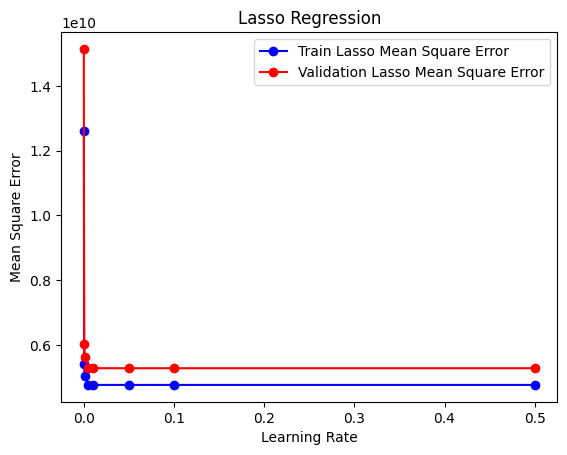

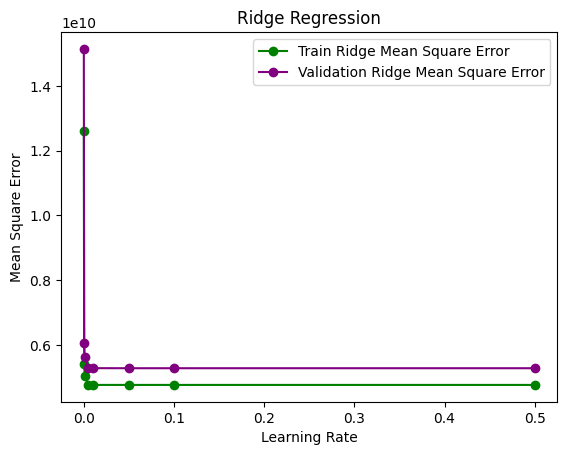

Text(0.5, 1.0, 'Linear Regression')

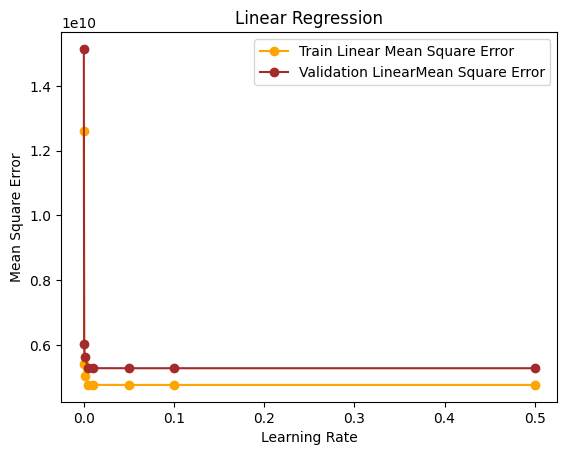

In [ ]:
learning_rate=[0.0001,0.0005, 0.001,0.005,0.01,0.05,0.1,0.5]
lasso_val_plot_mean_squared_errors =[]
lasso_train_plot_mean_squared_errors=[]
ridge_val_plot_mean_squared_errors=[]
ridge_train_plot_mean_squared_errors=[]
Linear_val_plot_mean_squared_errors=[]
Linear_train_plot_mean_squared_errors=[]


for lr in learning_rate:
  w_lasso=np.zeros(x_train.shape[1])
  bias_lasso=0
  w_lasso,bias_lasso=lasso_fit(x_train_lasso, y_train_lasso, learning_rate=lr, epochs=best_epoch_lasso, alpha=best_alpha_lasso)

  val_y_pred_lasso=predict(x_val_lasso,w_lasso,bias_lasso)
  train_y_pred_lasso=predict(x_train_lasso,w_lasso,bias_lasso)

  lasso_val_plot_mean_squared_errors.append(mean_squared_error(y_val_lasso, val_y_pred_lasso))
  lasso_train_plot_mean_squared_errors.append(mean_squared_error(y_train_lasso, train_y_pred_lasso))

  w_ridge=np.zeros(x_train.shape[1])
  bias_ridge=0

  w_ridge,bias_ridge=ridge_fit(x_train, y_train, learning_rate=lr, epochs=best_epoch_ridge, alpha=best_alpha_ridge)

  val_y_pred_ridge=predict(x_val,w_ridge,bias_ridge)
  train_y_pred_ridge=predict(x_train,w_ridge,bias_ridge)

  ridge_val_plot_mean_squared_errors.append(mean_squared_error(y_val, val_y_pred_ridge))
  ridge_train_plot_mean_squared_errors.append(mean_squared_error(y_train, train_y_pred_ridge))

  lr_weights, lr_bias = linear_gradient_regression_fit(x_train, y_train,learning_rate=lr,epochs=best_epoch_LR)

  lr_predict_val = predict(x_val, lr_weights, lr_bias)
  lr_predict_train=predict(x_train, lr_weights, lr_bias)

  Linear_val_plot_mean_squared_errors.append(mean_squared_error(y_val, lr_predict_val))
  Linear_train_plot_mean_squared_errors.append(mean_squared_error(y_train, lr_predict_train))

plt.plot(learning_rate, lasso_train_plot_mean_squared_errors, marker='o', label='Train Lasso Mean Square Error',color="blue")
plt.plot(learning_rate, lasso_val_plot_mean_squared_errors, marker='o', label='Validation Lasso Mean Square Error', color='red')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Mean Square Error')
plt.title('Lasso Regression')
plt.show()


plt.plot(learning_rate, ridge_train_plot_mean_squared_errors, marker='o', label='Train Ridge Mean Square Error', color='green')
plt.plot(learning_rate, ridge_val_plot_mean_squared_errors, marker='o', label='Validation Ridge Mean Square Error', color='purple')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Mean Square Error')
plt.title('Ridge Regression')
plt.show()


plt.plot(learning_rate, Linear_train_plot_mean_squared_errors, marker='o', label='Train Linear Mean Square Error', color='orange')
plt.plot(learning_rate, Linear_val_plot_mean_squared_errors, marker='o', label='Validation LinearMean Square Error', color='brown')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Mean Square Error')
plt.title('Linear Regression')


Plotting difference between alphas and MSE

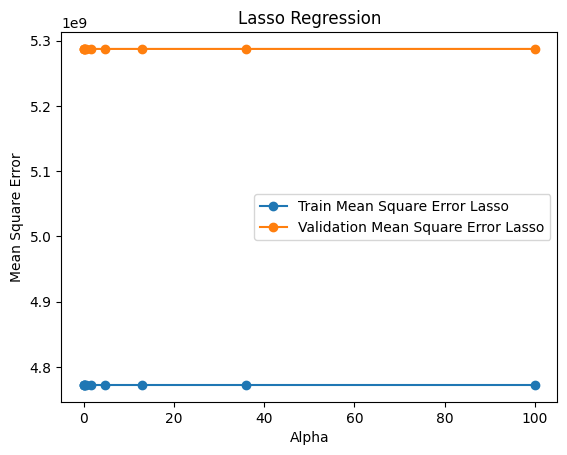

Text(0.5, 1.0, 'Lasso and Ridge Regression')

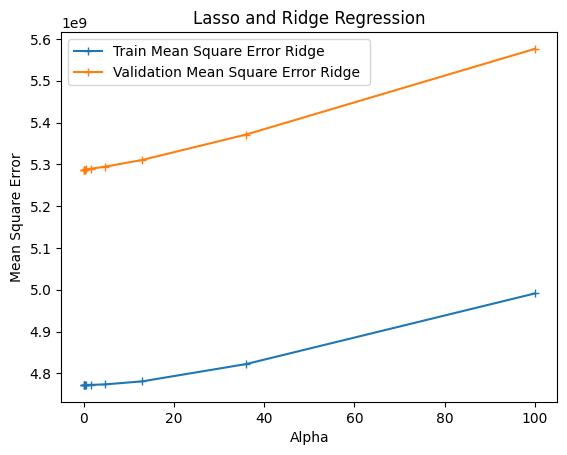

In [ ]:
alphas=np.logspace(-2,2,10)
val_plot_mean_squared_errors_lasso =[]
train_plot_mean_squared_errors_lasso=[]
val_plot_mean_squared_errors_ridge=[]
train_plot_mean_squared_errors_ridge=[]

for alpha in alphas:
  w_lasso=np.zeros(x_train.shape[1])
  bias_lasso=0
  w_lasso,bias_lasso=lasso_fit(x_train_lasso, y_train_lasso, learning_rate=best_lr_lasso, epochs=best_epoch_lasso, alpha=alpha)
  val_y_pred=predict(x_val_lasso,w_lasso,bias_lasso)
  train_y_pred=predict(x_train_lasso,w_lasso,bias_lasso)
  val_plot_mean_squared_errors_lasso.append(mean_squared_error(y_val_lasso, val_y_pred))
  train_plot_mean_squared_errors_lasso.append(mean_squared_error(y_train_lasso, train_y_pred))


  w_ridge=np.zeros(x_train.shape[1])
  bias_ridge=0
  w_ridge,bias_ridge=ridge_fit(x_train, y_train, learning_rate=best_lr_ridge, epochs=best_epoch_ridge, alpha=alpha)
  val_y_pred_ridge=predict(x_val,w_ridge,bias_ridge)
  train_y_pred_ridge=predict(x_train,w_ridge,bias_ridge)
  val_plot_mean_squared_errors_ridge.append(mean_squared_error(y_val, val_y_pred_ridge))
  train_plot_mean_squared_errors_ridge.append(mean_squared_error(y_train, train_y_pred_ridge))


plt.plot(alphas, train_plot_mean_squared_errors_lasso, marker='o', label='Train Mean Square Error Lasso')
plt.plot(alphas, val_plot_mean_squared_errors_lasso, marker='o', label='Validation Mean Square Error Lasso')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('Lasso Regression')
plt.show()
plt.plot(alphas, train_plot_mean_squared_errors_ridge, marker='+', label='Train Mean Square Error Ridge')
plt.plot(alphas, val_plot_mean_squared_errors_ridge, marker='+', label='Validation Mean Square Error Ridge ')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('Lasso and Ridge Regression')


Manual Testing

In [ ]:
w_test=np.zeros(x_train.shape[1])
bias_test=0
w_test,bias_test=lasso_fit(x_train_lasso, y_train_lasso, learning_rate=best_lr_lasso, epochs=best_epoch_lasso, alpha=best_alpha_lasso)
y_pred_test=predict(x_test,w_test,bias_test)
print("Test MSE Lasso:", mean_squared_error(y_test, y_pred_test))
print("Test ASE Lasso", mean_absolute_error(y_test, y_pred_test))

w_test_ridge=np.zeros(x_train.shape[1])
bias_test_ridge=0
w_test_ridge,bias_test_ridge=ridge_fit(x_train, y_train, learning_rate=best_lr_ridge, epochs=best_epoch_ridge, alpha=best_alpha_ridge)
y_pred_test_ridge=predict(x_test,w_test_ridge,bias_test_ridge)
print("Test MSE Ridge:", mean_squared_error(y_test, y_pred_test_ridge))
print("Test ASE Ridge", mean_absolute_error(y_test, y_pred_test_ridge))

w_test_LRG=np.zeros(x_train.shape[1])
bias_test_LRG=0
w_test_LRG, bias_test_LRG = linear_gradient_regression_fit(x_train, y_train,learning_rate=best_lr_LR,epochs=best_epoch_LR)
y_pred_test_LRG = predict(x_test, w_test_LRG, bias_test_LRG)
print("Test MSE Linear with Gradient:", mean_squared_error(y_test, y_pred_test_LRG))
print("Test ASE Linear with Gradient", mean_absolute_error(y_test, y_pred_test_LRG))

w_LR,b_LR=linear_regression_normal_equation(x_train, y_train)
y_pred_test_LR=predict(x_test,w_LR,b_LR)
print("Test MSE Linear:", mean_squared_error(y_test, y_pred_test_LR))
print("Test ASE Linear", mean_absolute_error(y_test, y_pred_test_LR))

w_ridge_normal=np.zeros(x_train.shape[1])
bias_ridge_normal=0
w_ridge_normal,bias_ridge_normal=ridge_fit_matrix(x_train, y_train, alpha=best_alpha_ridge)
y_pred_ridge_normal=predict(x_test,w_ridge_normal,bias_ridge_normal)
print("Test MSE Ridge without Gradient:", mean_squared_error(y_test, y_pred_ridge_normal))
print("Test ASE Ridge With Gradient", mean_absolute_error(y_test, y_pred_ridge_normal))




Test MSE Lasso: 4876529580.248533
Test ASE Lasso 51123.87197375933
Test MSE Ridge: 4876497907.234337
Test ASE Ridge 51123.65737118505
Test MSE Linear with Gradient: 4876529580.785166
Test ASE Linear with Gradient 51123.87197684996
Test MSE Linear: 4876529580.533164
Test ASE Linear 51123.8719763402
Test MSE Ridge without Gradient: 4876497906.983549
Test ASE Ridge With Gradient 51123.65737067784


Scikit Testing

In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
print("Test MSE Linear:", mean_squared_error(y_test, y_pred_lr))
print("Test ASE Linear:", mean_absolute_error(y_test, y_pred_lr))

lasso=Lasso(alpha=best_alpha_lasso_scikit)
lasso.fit(x_train_lasso, y_train_lasso)
y_pred_lasso=lasso.predict(x_test)
print("Test MSE Lasso:", mean_squared_error(y_test, y_pred_lasso))
print("Test ASE Lasso:", mean_absolute_error(y_test, y_pred_lasso))

ridge=Ridge(alpha=best_alpha_ridge_scikit)
ridge.fit(x_train, y_train)
y_pred_ridge=ridge.predict(x_test)
print("Test MSE Ridge:", mean_squared_error(y_test, y_pred_ridge))
print("Test ASE Ridge:", mean_absolute_error(y_test, y_pred_ridge))


Test MSE Linear: 4876529580.533166
Test ASE Linear: 51123.87197634018
Test MSE Lasso: 4876528468.535646
Test ASE Lasso: 51123.86552987625
Test MSE Ridge: 4876497906.983552
Test ASE Ridge: 51123.65737067786
